# Import Libaries, Functions and Dataset

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%cd drive/MyDrive/ENGG_680_Project/Database/

/content/drive/MyDrive/ENGG_680_Project/Database


In [3]:
!ls

 catboost_info					   'SS CFST Database_Finalised.xlsx'
'SS CFST Database_Finalised_for correlation.xlsx'  'SS CFST Database.xlsx'


In [4]:
#importing libraries and linear regression from scikit learn
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import GridSearchCV

#Loading database
df = pd.read_excel("SS CFST Database_Finalised_for correlation.xlsx")
df_circ = pd.read_excel("SS CFST Database_Finalised_for correlation.xlsx", sheet_name = 2)

# Rectangular Linear Regression Full Data Set

In [5]:
# Define X (features) and y (target)
X = df.drop(columns=['N_Test'])
y = df['N_Test']

#printing shape to confirm number of features and values
print(X.shape)
print(y.shape)

(211, 10)
(211,)


In [6]:
# Split the data into training and test (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
# Define the pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),               # Standardize features
    ('poly', PolynomialFeatures(include_bias=False)),  # Generate polynomial features
    ('linreg', LinearRegression())             # Linear Regression model
])

In [8]:
# Define hyperparameter grid for GridSearchCV
param_grid = {
    'poly__degree': [1, 2, 3],        # Degree of polynomial features
    'linreg__fit_intercept': [True, False]  # Whether to include an intercept
}

In [9]:
# Initialize GridSearchCV
grid_search = GridSearchCV(
    estimator=pipeline,
    param_grid=param_grid,
    scoring='r2',  # Use R^2 for ranking
    cv=3,          # 3-fold cross-validation
    verbose=2,
    n_jobs=-1      # Use all available CPU cores
)

In [10]:
# Fit GridSearchCV
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 6 candidates, totalling 18 fits


/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('poly',
                                        PolynomialFeatures(include_bias=False)),
                                       ('linreg', LinearRegression())]),
             n_jobs=-1,
             param_grid={'linreg__fit_intercept': [True, False],
                         'poly__degree': [1, 2, 3]},
             scoring='r2', verbose=2)

In [11]:
# Retrieve the best pipeline and hyperparameters
best_pipeline = grid_search.best_estimator_
print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'linreg__fit_intercept': True, 'poly__degree': 1}


In [12]:
# Define MAPE function
def mean_absolute_percentage_error(y_true, y_pred):
    epsilon = np.finfo(np.float64).eps
    return np.mean(np.abs((y_true - y_pred) / (y_true + epsilon))) * 100

# Predictions on training and test sets
y_train_pred = best_pipeline.predict(X_train)
y_test_pred = best_pipeline.predict(X_test)

# Training set metrics
train_mse = mean_squared_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)
train_mape = mean_absolute_percentage_error(y_train, y_train_pred)

# Test set metrics
test_mse = mean_squared_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)
test_mape = mean_absolute_percentage_error(y_test, y_test_pred)

# Display results
print("\nTraining Set Metrics:")
print(f"  R^2: {train_r2:.3f}")
print(f"  MSE: {train_mse:.3f}")
print(f"  MAPE: {train_mape:.3f}%")

print("\nTest Set Metrics:")
print(f"  R^2: {test_r2:.3f}")
print(f"  MSE: {test_mse:.3f}")
print(f"  MAPE: {test_mape:.3f}%")


Training Set Metrics:
  R^2: 0.944
  MSE: 65236.237
  MAPE: 30.899%

Test Set Metrics:
  R^2: 0.923
  MSE: 99998.651
  MAPE: 35.595%


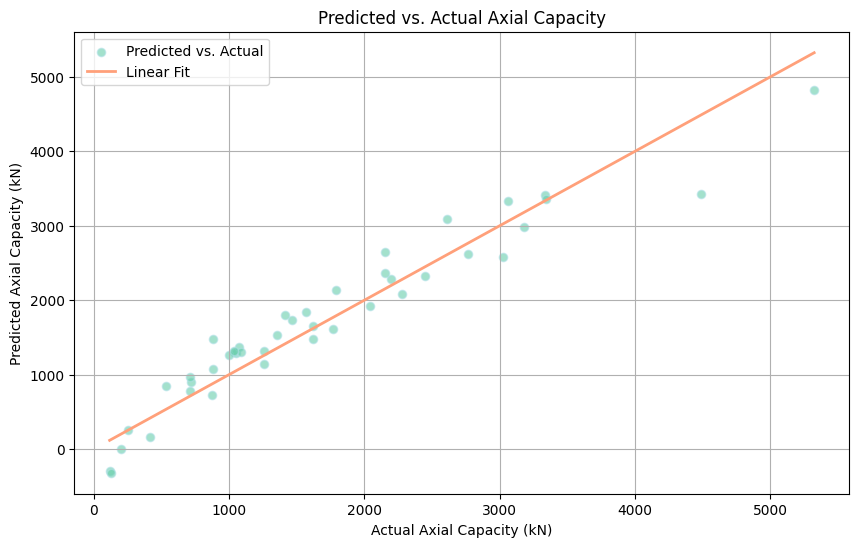

In [13]:
# Scatter Plot: Predicted vs. Actual Values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_test_pred, alpha=0.6, color='mediumaquamarine', edgecolors='powderblue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'lightsalmon', linewidth=2)
plt.xlabel('Actual Axial Capacity (kN)')
plt.ylabel('Predicted Axial Capacity (kN)')
plt.title('Predicted vs. Actual Axial Capacity')
plt.legend(['Predicted vs. Actual','Linear Fit'])
plt.grid(True)
plt.show()

# Circular Linear Regression for Full Data set

In [14]:
# Define X (features) and y (target)
X = df_circ.drop(columns=['N_Test'])
y = df_circ['N_Test']

#printing shape to confirm number of features and values
print(X.shape)
print(y.shape)

(211, 9)
(211,)


In [15]:
# Split the data into training and test (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
# Define the pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),               # Standardize features
    ('poly', PolynomialFeatures(include_bias=False)),  # Generate polynomial features
    ('linreg', LinearRegression())             # Linear Regression model
])

In [17]:
# Define hyperparameter grid for GridSearchCV
param_grid = {
    'poly__degree': [1, 2, 3],        # Degree of polynomial features
    'linreg__fit_intercept': [True, False]  # Whether to include an intercept
}

In [18]:
# Initialize GridSearchCV
grid_search = GridSearchCV(
    estimator=pipeline,
    param_grid=param_grid,
    scoring='r2',  # Use R^2 for ranking
    cv=3,          # 3-fold cross-validation
    verbose=2,
    n_jobs=-1      # Use all available CPU cores
)

In [19]:
# Fit GridSearchCV
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 6 candidates, totalling 18 fits


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('poly',
                                        PolynomialFeatures(include_bias=False)),
                                       ('linreg', LinearRegression())]),
             n_jobs=-1,
             param_grid={'linreg__fit_intercept': [True, False],
                         'poly__degree': [1, 2, 3]},
             scoring='r2', verbose=2)

In [20]:
# Retrieve the best pipeline and hyperparameters
best_pipeline = grid_search.best_estimator_
print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'linreg__fit_intercept': True, 'poly__degree': 1}


In [21]:
# Define MAPE function
def mean_absolute_percentage_error(y_true, y_pred):
    epsilon = np.finfo(np.float64).eps
    return np.mean(np.abs((y_true - y_pred) / (y_true + epsilon))) * 100

# Predictions on training and test sets
y_train_pred = best_pipeline.predict(X_train)
y_test_pred = best_pipeline.predict(X_test)

# Training set metrics
train_mse = mean_squared_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)
train_mape = mean_absolute_percentage_error(y_train, y_train_pred)

# Test set metrics
test_mse = mean_squared_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)
test_mape = mean_absolute_percentage_error(y_test, y_test_pred)

# Display results
print("\nTraining Set Metrics:")
print(f"  R^2: {train_r2:.3f}")
print(f"  MSE: {train_mse:.3f}")
print(f"  MAPE: {train_mape:.3f}%")

print("\nTest Set Metrics:")
print(f"  R^2: {test_r2:.3f}")
print(f"  MSE: {test_mse:.3f}")
print(f"  MAPE: {test_mape:.3f}%")


Training Set Metrics:
  R^2: 0.909
  MSE: 559748.142
  MAPE: 85.461%

Test Set Metrics:
  R^2: 0.812
  MSE: 504691.736
  MAPE: 71.875%


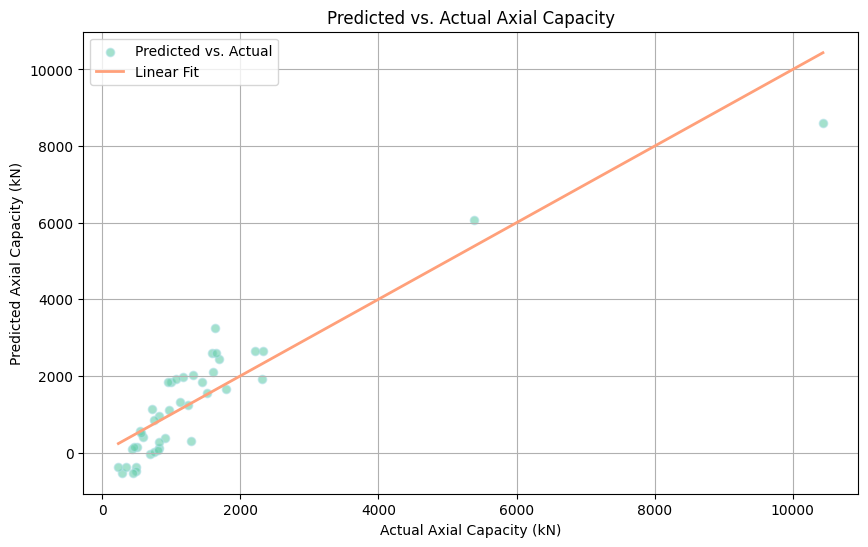

In [22]:
# Scatter Plot: Predicted vs. Actual Values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_test_pred, alpha=0.6, color='mediumaquamarine', edgecolors='powderblue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'lightsalmon', linewidth=2)
plt.xlabel('Actual Axial Capacity (kN)')
plt.ylabel('Predicted Axial Capacity (kN)')
plt.title('Predicted vs. Actual Axial Capacity')
plt.legend(['Predicted vs. Actual','Linear Fit'])
plt.grid(True)
plt.show()